# Ray Tracing
Now that we are used to many of the tools and techniques to visualise objects, rotate and transform them, we can explore how mathematics allows us to check if/how some types of objects *interact* using Python: Ray Tracing.

In [1]:
## Libraries
%matplotlib inline
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import Axes3D, proj3d

First we need to set up a ray and an object: after this we will explore if/how to equate the expressions for a specific value or values of the length along the ray. We will begin, as we did in the lectures, using spheres (or their 2D equivalent, circles) to illustrate the procedure.

Before we examine some specific examples, it would be nice to also visualise the examples as we go. We will therefore first set up some of the 3D objects that we will need to plot. First, we will want to visualise a 3D sphere. Lets set up a 3D object in the shape of a sphere:

In [2]:
def plt_sphere(center, radius):
  """ function to create and plot a 3D sphere at a given centre and radius
  """
  plt.subplot(projection='3d')
  # draw sphere
  u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
  x = radius*np.cos(u)*np.sin(v)+center[0]
  y = radius*np.sin(u)*np.sin(v)+center[1]
  z = radius*np.cos(v)+center[2]

  ax.plot_surface(x, y, z, color=np.random.choice(['g','b']), alpha=0.25)

We will also need to work with vectors, so lets create and use a custom arrow to represent each ray:

In [3]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs)

## Lecture Example 1: Does a ray intersect a sphere?
**Determine if the ray from $(-1,0,3)$ with direction $2\vec{i}-3\vec{j}+\vec{k}$ intersects a sphere with centre $(3,3,3)$ and radius $2$.**

First we will set up the ray, which must have an origin and direction. The distance along the ray is determined by a parameter, $t$, which varies $\in[0,1]$ if the ray has a start and end position, or is simply $>0$ if the ray is infinitely long.

In this implementation, Python can handle maths involving unknown values, so we will tell it to create a vector expression describing the ray in terms of the origin plus the vector direction times the symbolic expression "t":

In [4]:
ray_o = sym.Matrix([[-1, 0, 3]])
ray_v = sym.Matrix([[2, 3, 1]])
t = sym.Symbol('t', positive=True)
ray = ray_o + t * ray_v

We want to explore if this ray interacts with the sphere given in the question. The equation of a sphere is, as we know, 

$$(x-a)^2+(y-b)^2+(z-c)^2 = r^2, 
$$

for a sphere centred on $(a,b,c)$ with radius $r$. 

We can replicate this in Python, again using symbols for variables $x$, $y$ and $z$. To confirm we have the correct expression, we'll create it and print it:

In [5]:
sphere_c = sym.Matrix([[3, 3, 3]])
sphere_r = 2
x, y, z = sym.Symbol('x'), sym.Symbol('y'), sym.Symbol('z') 
sphere = (x - sphere_c[0])**2+(y - sphere_c[1])**2+(z - sphere_c[2])**2-sphere_r**2
print(sphere)

(x - 3)**2 + (y - 3)**2 + (z - 3)**2 - 4


In the lectures, we saw that we need to substitute the parametric form of the ray equation into the equation of the sphere, then solve for the value of parameter $t$. We can do this in one line in Python:

In [6]:
print(sym.solve(sphere.subs([(x, ray[0]), (y, ray[1]), (z, ray[2])]),t))

[]


The result is Python's way of saying that it could not find any solutions.

We placed a restriction on the parameter t that it must be positive: this tells Python that t cannot be imaginary. If we remove the positive restriction on t, we can determine the complex solutions to this equation. However, complex values means that there are *no* intersections between this sphere and this ray.


---


We should check this result visually with a plot.

So far, we have saved coordinates using sympy's "matrix" command, which has allowed us to create 3D vectors for our ray. Sadly, a lot of the plotting routines work with a different data structure, so we'll have to convert important coordinates to the correct datatype in order to plot them:

In [7]:
ro = np.array(ray_o.tolist()[0],dtype='float64') #convert ray origin to numpy array
spc = np.array(sphere_c.tolist()[0],dtype='float64') #convert sphere centre to numpy array

Finally, we can plot the sphere in the required location, the directed line segment (ray) and check visually if the objects appear to intersect:

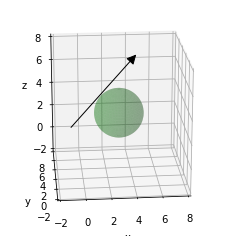

In [8]:
ax = plt.figure().add_subplot(projection='3d')
ax.view_init(elev=20, azim=265, roll=0)
ax.axes.set_xlim3d(left=-2, right=8) 
ax.axes.set_ylim3d(bottom=-2, top=8) 
ax.axes.set_zlim3d(bottom=-2, top=8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt_sphere(spc,sphere_r)
end = (ray.subs(t,3))
end=np.array(end.tolist()[0],dtype='float64')
arrow_prop_dict = dict(mutation_scale=20, arrowstyle='-|>', color='k', shrinkA=0, shrinkB=0, linewidth=1)
b = Arrow3D([ro[0], end[0]], [ro[1], end[1]], [ro[2], end[2]], **arrow_prop_dict)
ax.add_artist(b)
plt.gca().set_aspect('equal')
plt.show() 

In this example, it is clear that the ray misses the sphere, as expected.

## Lecture Example 2: Multiple intersections and normal calculation
**Determine the unit normal where the ray from $(1,-2,-1)$ with direction ${\vec{i}}+2{\vec{j}}+4{\vec{k}}$ first intersects the sphere with centre $(3,0,5)$ and radius $3$.**

We will leave the unit normal calculation until after we have identified all intersections with the object. We'll recycle the same process we used in Example 1, but changing the constants to match the Example 2 values:

In [9]:
r2_o = sym.Matrix([[1, -2, -1]])
r2_v = sym.Matrix([[1, 2, 4]]) 
ray2 = r2_o + t * r2_v
s2_c = sym.Matrix([[3, 0, 5]])
s2_r = 3
s2 = (x - s2_c[0])**2+(y - s2_c[1])**2+(z - s2_c[2])**2-s2_r**2

We will again use the solve command to allow Python to find values of t when we substitute the parametric forms of the ray equation into the equation of the sphere.

Unlike last time, the solution we saw in class implies that we should expect two intersections. The first intersection corresponds to entering the sphere, and the second is when the ray leaves the sphere. We therefore need to arrange the solutions in size order, which the Python "sort" function will take care of. We can then print them in order:

In [10]:
sols = sym.solve(s2.subs([(x, ray2[0]), (y, ray2[1]), (z, ray2[2])]),t)
sols.sort()
for i, val in enumerate(sols):
    print("intersection {} found at t={}".format(i+1,val.evalf()))

intersection 1 found at t=0.816893686730232
intersection 2 found at t=2.04024917041263


Once again we will likely want to check out some plots to confirm our solutions. For later, we'll again convert the first intersection location and the ray origin to a plottable array. To help us, we'll also pick a much larger value of $t$ and convert the end of this ray to a plottable array: this is so that we can visualise where the ray *would* have ended up had it not intersected the object: 

In [11]:
is1  = (ray2.subs(t,sols[0].evalf()))
is1a = np.array(is1.tolist()[0],dtype='float64')
is2  = (ray2.subs(t,sols[1].evalf()))
is2a = np.array(is2.tolist()[0],dtype='float64')
r2o  = np.array(r2_o.tolist()[0],dtype='float64')
end2 = (ray2.subs(t,10))
end2 = np.array(end2.tolist()[0],dtype='float64')
sc   = np.array(s2_c.tolist()[0],dtype='float64')

This example specifically asks for the normal to the sphere at the intersection location. Since we know a general expression for the normal of a sphere at a given point, we can create a custom function to return the normal at any point on the sphere (if provided the centre, radius and location where the normal is to be evaluated):

In [12]:
def spherenormal(o,r,p):
  """Function to return normal vector to a sphere at a given point.
  Sphere centred on o (3 element list), radius r at point p. 
  """
  n = sym.Matrix([[p[0]-o[0], p[1]-o[1], p[2]-o[2]]])
  n = n/r
  return n

To test this routine, we can feed in the sphere centre and radius, together with the intercept location found earlier. 

In [13]:
print(spherenormal(s2_c,s2_r,is1))
nhat = spherenormal(s2_c,s2_r,is1)
nhat = np.array(nhat.tolist()[0],dtype='float64')

Matrix([[-0.394368771089923, -0.122070875513179, -0.910808417693024]])


Once again, these values match the normal calculated in the lectures (to a much higher number of decimal places).


---

Our final step will be to plot the quantities we have calculated:


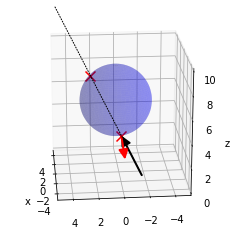

In [14]:
ax = plt.figure().add_subplot(projection='3d')
ax.view_init(elev=20, azim=175, roll=0)
ax.axes.set_xlim3d(left=-5, right=5) 
ax.axes.set_ylim3d(bottom=-5, top=5) 
ax.axes.set_zlim3d(bottom=0, top=10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt_sphere(sc,s2_r)
ax.scatter(is1a[0],is1a[1],is1a[2], c='r', marker='x', s=100) 
ax.scatter(is2a[0],is2a[1],is2a[2], c='r', marker='x', s=100) 
arrow_prop_dict = dict(mutation_scale=20, arrowstyle='-|>', color='k', shrinkA=0, shrinkB=0, linewidth=2)
a = Arrow3D([r2o[0], is1a[0]], [r2o[1], is1a[1]], [r2o[2], is1a[2]], **arrow_prop_dict)
ax.add_artist(a)
arrow_prop_dict = dict(mutation_scale=20, arrowstyle='-|>', color='k', shrinkA=0, shrinkB=0, linewidth=1, linestyle=':')
b = Arrow3D([r2o[0], end2[0]], [r2o[1], end2[1]], [r2o[2], end2[2]], **arrow_prop_dict)
ax.add_artist(b)
arrow_prop_dict = dict(mutation_scale=20, arrowstyle='-|>', color='r', shrinkA=0, shrinkB=0, linewidth=2)
c = Arrow3D([is1a[0], is1a[0]+2.0*nhat[0]], [is1a[1], is1a[1]+2.0*nhat[1]], [is1a[2], is1a[2]+2.0*nhat[2]], **arrow_prop_dict)
ax.add_artist(c)
plt.gca().set_aspect('equal')
plt.show() 

This 3D image illustrates the ray intersecting the sphere. 

The intersection locations that we calculated earlier are shown as red crosses, and match the locations that the ray would encounter if it passes the sphere and continues beyond the range of the plot.

The normal that we calculated is shown as a red arrow, and also behaves as we would expect (pointing directly away from the sphere surface at the chosen location).

We can repeat the same process for any object which is fully described by a mathematical equation. Commmon examples include cones and paraboloids. Some of these objects can be difficult to visualise.


## Lecture Example 3: General object
**Find the unit normal at the point where the ray from $(-1,2,0)$ to $(3,1,4)$ cuts the hyperbolic paraboloid $x^2-y^2+4z=0$.**

In [15]:
r3_o = sym.Matrix([[1, -2, -1]])
r3_e = sym.Matrix([[1, 2, 4]])
t = sym.Symbol('t', positive=True) 
ray3 = r3_o + t * (r3_e - r3_o)
hp = x**2 - y**2 + 4 * z
print(hp)

x**2 - y**2 + 4*z


In [16]:
sols = sym.solve(hp.subs([(x, ray3[0]), (y, ray3[1]), (z, ray3[2])]),t)
valid_sols = [i for i in sols if i <= 1]
valid_sols.sort()
for i, val in enumerate(valid_sols) :
    print("intersection {} found at t={}".format(i+1,val.evalf()))

intersection 1 found at t=0.214986263839935


In [17]:
is3  = (ray3.subs(t,valid_sols[0].evalf()))
is3a = np.array(is3.tolist()[0],dtype='float64')
print("intersection occurs at ({:0.3f},{:0.3f},{:0.3f})".format(is3a[0],is3a[1],is3a[2]))

intersection occurs at (1.000,-1.140,0.075)


In an ideal world we would visually check that the ray intersects this object: Python isn't great for complex visualisation. One way to check what this object looks like is to use a special library that allows you to examine an isosurface of a 3D function like ours. To do this we may have to install a special library called "plotly".

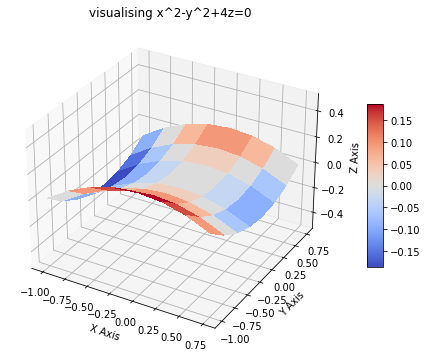

In [18]:
from matplotlib import cm
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12,6))

X = np.arange(-1, 1, 0.25)
Y = np.arange(-1, 1, 0.25)
X, Y = np.meshgrid(X, Y)
#rearranging the expression to make z the subject:
Z = (X*X-Y*Y)/(-4)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-0.51, 0.51)
ax.title.set_text('visualising x^2-y^2+4z=0')
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
fig.colorbar(surf, shrink=0.5, aspect=10)

This function looks like a saddle point: we encountered saddle points when looking at Partial Derivatives. 

Maybe, using your maths skills, you could check whether this is a true saddle point, **using the second derivative test**?

A note of caution: Python can handle some 3D images, but that isn't really what it was made to do. There are other plotting libraries to play with (try "scikit-image" for example), but really you already know about graphics programming in other ways!

## Over to you
Try some more examples from the lectures or the tutorial questions once you are satisfied with the mathematics.